<a href="https://colab.research.google.com/github/elaaatif/DATA-MINING-PhiUSIIL-Phishing-URL/blob/main/Phishing_URL_(Website)_DATA_MINING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PhiUSIIL Phishing URL (Website)           - DATA MINING PROJECT **

**Made by :**  
- [ ABDELATIF MEKRI ]
- [ NAHLA YASMINE MIHOUBI ]
- [ HALIMA NFIDSA ]



---



 *Installing packages*

In [ ]:
!pip install ydata_profiling==4.0.0
!pip install pandas-profiling==3.0.0
!pip install matplotlib==3.3.4

  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.0.0 requires visions[type_image_path]==0.7.1, but you have visions 0.7.5 which is incompatible.


  Using cached visions-0.7.1-py3-none-any.whl (102 kB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/

*Imports*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


**------------------------------------------------------------------------------------------------------------------------------------**

*Reading and viewing the data*

In [ ]:
df= pd.read_csv("/content/PhiUSIIL_Phishing_URL_Dataset.csv")

df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

 *Complete UNIVARIATE analysis on the dataset*

In [ ]:
#profile.to_file(output_file="REPORT.html")
# Generate profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the report as widgets
profile.to_widgets()

print("Profiling Report displayed as widgets.")

*DATA MINING WITH RANDOM FOREST*

In [ ]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


In [ ]:
df= df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'])

df = pd.get_dummies(df, columns=['TLD'])
df.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(columns=['label'])
y = df['label']
X.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)


*Accuracy , Confusion Matrix & Classification report*

In [ ]:

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9999575902796921


In [ ]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=20))

Classification Report:
                      precision    recall  f1-score   support

                   0  1.00000000000000000000 0.99990061617968595264 0.99995030562043429878     20124
                   1  0.99992602729592783284 1.00000000000000000000 0.99996301227992312466     27035

            accuracy                      0.99995759027969211008     47159
           macro avg  0.99996301364796391642 0.99995030808984297632 0.99995665895017871172     47159
        weighted avg  0.99995759341685375166 0.99995759027969211008 0.99995759001024919765     47159



In [ ]:
# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[20122     2]
 [    0 27035]]


*Inhanced visualisation of the results*

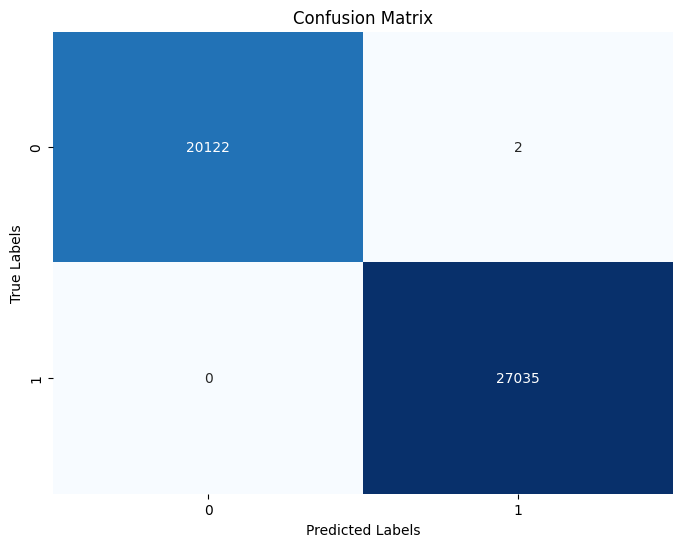

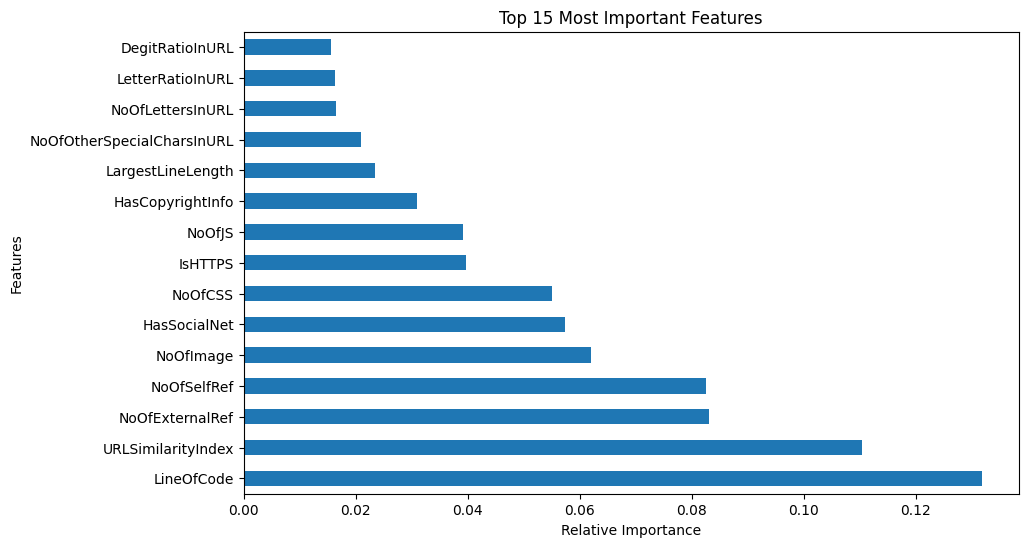

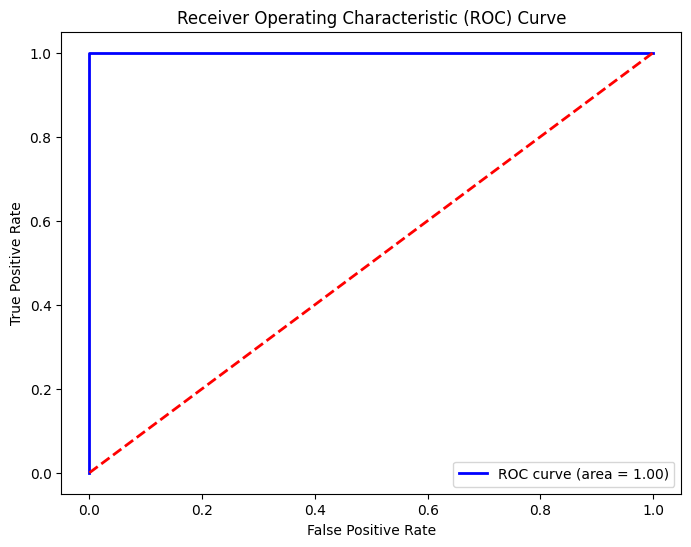

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Plotting ROC curve
probs = rf_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
